In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam

# Data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

# Funtion API 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate, add

In [2]:
# Load Fashine MNIST
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Reshape size
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Normalize the range of featurs
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# 模型概念

#             h_2_1 - 
#     h_1_1 - 
#             h_2_2 - 
# X -                  h_3 - y
#             h_2_3 - 
#     h_1_1 - 
#             h_2_4 - 

In [3]:
x = Input(shape=(784,))
f_1_1 = Dense(500, activation='sigmoid')
f_1_2 = Dense(500, activation='sigmoid')
f_2_1 = Dense(500, activation='sigmoid')
f_2_2 = Dense(500, activation='sigmoid')
f_2_3 = Dense(500, activation='sigmoid')
f_2_4 = Dense(500, activation='sigmoid')
f_last = Dense(10, activation='softmax')

In [4]:
h_1_1 = f_1_1(x)
h_1_2 = f_1_2(x)
h_2_1 = f_2_1(h_1_1)
h_2_2 = f_2_2(h_1_1)
h_2_3 = f_2_3(h_1_2)
h_2_4 = f_2_4(h_1_2)
h_3 = concatenate([h_2_1, h_2_2, h_2_3, h_2_4])
y = f_last(h_3)

In [5]:
model = Model(x, y)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 500)          392500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 500)          392500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 500)          250500      dense[0][0]                      
______________________________________________________________________________________________

In [6]:
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')

Input shape: (None, 784)
Output shape: (None, 10)


In [7]:
model.compile(loss='categorical_crossentropy', optimizer="sgd",metrics=['categorical_accuracy'])

In [10]:
History = model.fit(x_train, y_train, batch_size=50, epochs=25, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 14s 233us/sample - loss: 0.5937 - categorical_accuracy: 0.7825 - val_loss: 0.6032 - val_categorical_accuracy: 0.7823
Epoch 2/25
60000/60000 [==============================] - 13s 213us/sample - loss: 0.5800 - categorical_accuracy: 0.7900 - val_loss: 0.5901 - val_categorical_accuracy: 0.7848
Epoch 3/25
60000/60000 [==============================] - 13s 219us/sample - loss: 0.5671 - categorical_accuracy: 0.7953 - val_loss: 0.5758 - val_categorical_accuracy: 0.7918
Epoch 4/25
60000/60000 [==============================] - 14s 234us/sample - loss: 0.5551 - categorical_accuracy: 0.7991 - val_loss: 0.5725 - val_categorical_accuracy: 0.7917
Epoch 5/25
60000/60000 [==============================] - 14s 238us/sample - loss: 0.5450 - categorical_accuracy: 0.8036 - val_loss: 0.5602 - val_categorical_accuracy: 0.7954
Epoch 6/25
60000/60000 [==============================] - 15s 247us/sample 

真正的答案是: [array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)]


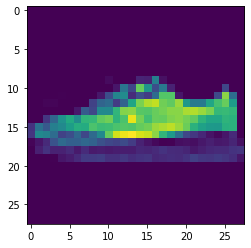

In [13]:
# result = New_model.predict_classes(x_test)
n=1569
#print('神經網路預測是:', name_list[result[n]])
print('真正的答案是:', [y_test[n]])
plt.imshow(x_test[n].reshape(28,28))

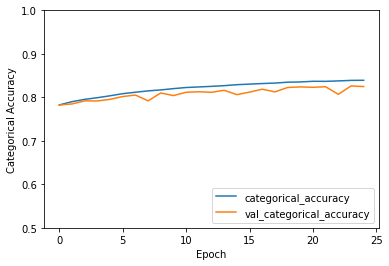

In [14]:
plt.plot(History.history['categorical_accuracy'], label='categorical_accuracy')
plt.plot(History.history['val_categorical_accuracy'], label = 'val_categorical_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Categorical Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

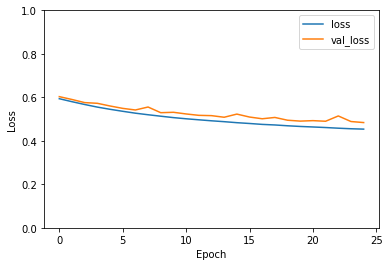

In [15]:
plt.plot(History.history['loss'], label='loss')
plt.plot(History.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')